In [2]:
import pandas as pd

df = pd.read_csv("../course_assignments/homework8/state_data.csv")

print(df.shape)
#52 rows, 4 columns

(52, 4)


In [4]:
print(df.head()) #First state - Alaska
print(df.tail()) #Last State - Wyoming
print(df) #51 total entries, more than 50 entries because PR (Puerto Rico) is also included

  state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
   state   latitude   longitude           name
47    VT  44.558803  -72.577841        Vermont
48    WA  47.751074 -120.740139     Washington
49    WI  43.784440  -88.787868      Wisconsin
50    WV  38.597626  -80.454903  West Virginia
51    WY  43.075968 -107.290284        Wyoming
   state   latitude   longitude                  name
0     AK  63.588753 -154.493062                Alaska
1     AL  32.318231  -86.902298               Alabama
2     AR  35.201050  -91.831833              Arkansas
3     AZ  34.048928 -111.093731               Arizona
4     CA  36.778261 -119.417932            California
5     CO  39.550051 -105.782067              Colorado
6     CT  41.603221  -73.087749           Connecticut
7     DC  38.905985  -77.033

In [19]:
median_lat = df['latitude'].median()
median_long = df['longitude'].median()

df['distance from median latitude'] = (df['latitude'] - median_lat).abs()
df['distance from median longitude'] = (df['longitude'] - median_long).abs()

print(df.shape)


closest_lat = df.loc[df['distance from median latitude'].idxmin()]
farthest_lat = df.loc[df['distance from median latitude'].idxmax()]
closest_long = df.loc[df['distance from median longitude'].idxmin()]
farthest_long = df.loc[df['distance from median longitude'].idxmax()]

print(f"Closest to median lat: {closest_lat["name"]} with a distance of {closest_lat['distance from median latitude']:.2f} from the median latitude")
print(f"Farthest from median lat: {farthest_lat["name"]} with a distance of {farthest_lat['distance from median latitude']:.2f} from the median latitude")

print(f"Closest to median long: {closest_long["name"]} with a distance of {closest_long['distance from median longitude']:.2f} from the median longitude")
print(f"Farthest from median long: {farthest_long["name"]} with a distance of {farthest_long['distance from median longitude']:.2f} from the median longitude")


(52, 6)
Closest to median lat: Colorado with a distance of 0.11 from the median latitude
Farthest from median lat: Alaska with a distance of 24.15 from the median latitude
Closest to median long: Illinois with a distance of 0.31 from the median longitude
Farthest from median long: Hawaii with a distance of 66.57 from the median longitude


In [22]:
#Shows only the columns/rows which include a certain datatype
#In this case, all are only "objects" which is why they don't show right I think
#Good for finding which column you want to take values from if you forgot name or want to isolate
#The columns you want in a large, new set of data without going through the whole thing
print(df.select_dtypes(include=["string"]))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ds = sns.load_dataset("diamonds")
ds = ds.dropna()

print(ds.shape) #59340 rows, 10 columns
print(ds.head())
print(ds.tail())
print(ds.columns) #carat - size of diamond, 
#cut - quality of cut, color - diamond color index, clarity - diamond clarity index, depth - diamond depth index
#table - cut quality, price - sell price of diamond, x, y, z - positional data of crystal structure

(53940, 10)
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
       carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      d

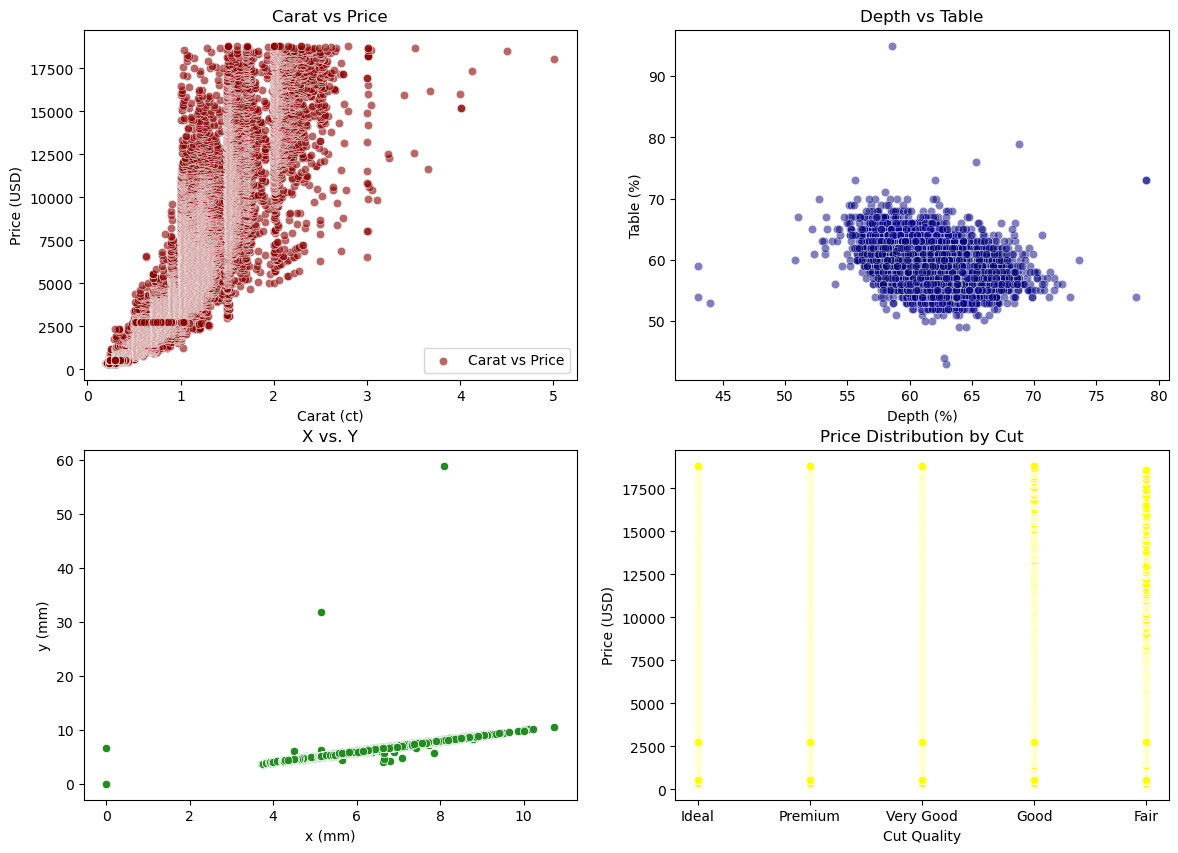

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(ax=axes[0, 0], data=ds, x="carat", y="price", color="darkred", alpha=0.6, label="Carat vs Price")
axes[0, 0].set_title("Carat vs Price")
axes[0, 0].set_xlabel("Carat (ct)")
axes[0, 0].set_ylabel("Price (USD)")
axes[0, 0].legend()

sns.scatterplot(ax=axes[0, 1], data=ds, x="depth", y="table", color="navy", alpha=0.5)
axes[0, 1].set_title("Depth vs Table")
axes[0, 1].set_xlabel("Depth (%)")
axes[0, 1].set_ylabel("Table (%)")

sns.scatterplot(ax=axes[1, 0], data=ds, x="x", y="y", color="forestgreen")
axes[1, 0].set_title("X vs. Y")
axes[1, 0].set_xlabel("x (mm)")
axes[1, 0].set_ylabel("y (mm)")

sns.scatterplot(ax=axes[1, 1], data=ds, x="cut", y="price", color="yellow")
axes[1, 1].set_title("Price Distribution by Cut")
axes[1, 1].set_xlabel("Cut Quality")
axes[1, 1].set_ylabel("Price (USD)")

plt.show()